# **Title of Project**

Bank Customer Churn Model

***github link ***

[github link](https://)

## **Objective**

Problem Definition: It helps you precisely define the problem you're addressing. For instance, whether you're predicting customer churn, classifying spam emails, or recommending products.

Data Collection and Preparation: Knowing your objective guides you in collecting the relevant data and preparing it appropriately for analysis or modeling.

Model Selection: Your objective influences the choice of models. Different types of problems (e.g., classification, regression, clustering) require different algorithms.

Feature Engineering: Depending on the objective, you might engineer or select specific features that are most relevant for the task.

Hyperparameter Tuning: The objective often guides the process of tuning hyperparameters to optimize model performance.

Evaluation Metrics: You choose evaluation metrics that align with your objective. For example, accuracy might be suitable for some cases, while precision and recall are more important in others.

Interpreting Results: The objective shapes how you interpret and present your results. It helps you determine whether the model's performance meets your intended goals.









## **Data Source**

## **Import Library**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
# Load Dataset
data = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [13]:
# Dataset First Look
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## **Describe Data**

In [3]:
data.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Memb

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [14]:
# Dataset Columns
print(data.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')


## **Data Visualization**

<ipython-input-4-e82b2c6af6c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


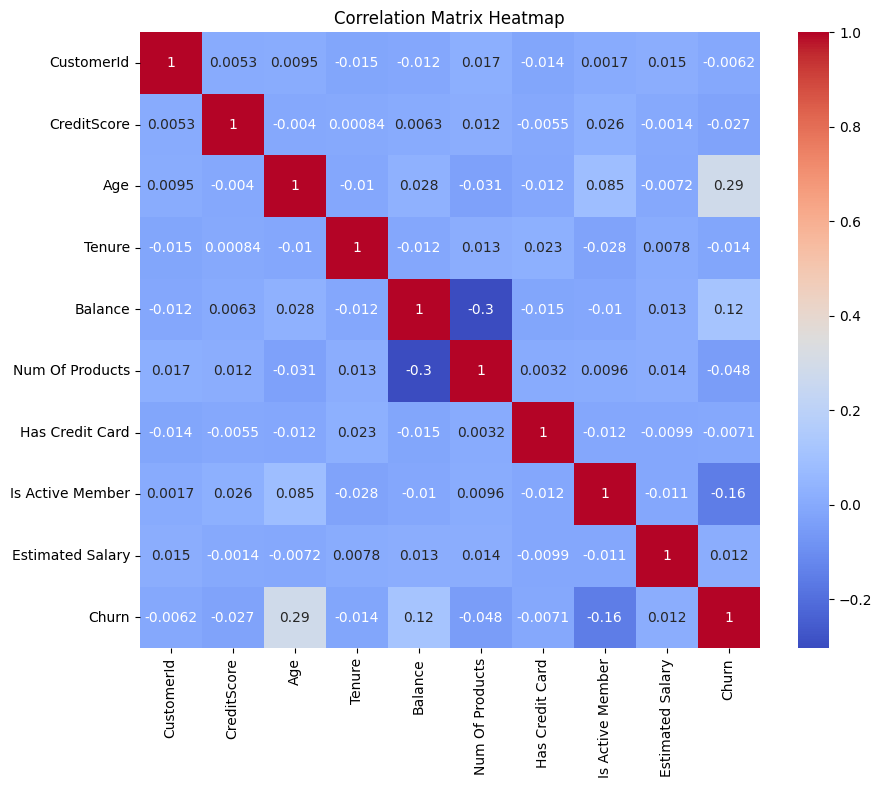

In [4]:
# Explore correlations between numerical features
correlation_matrix = data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

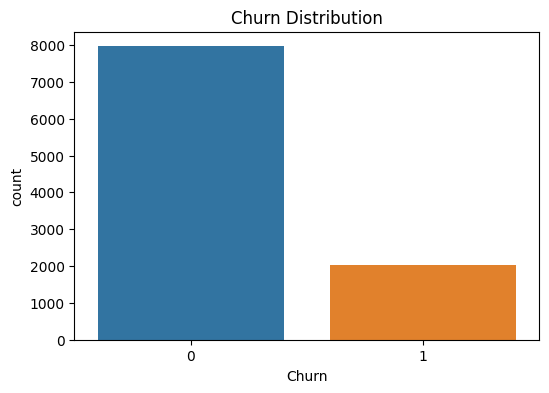

In [5]:
# Explore distribution of the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title("Churn Distribution")
plt.show()

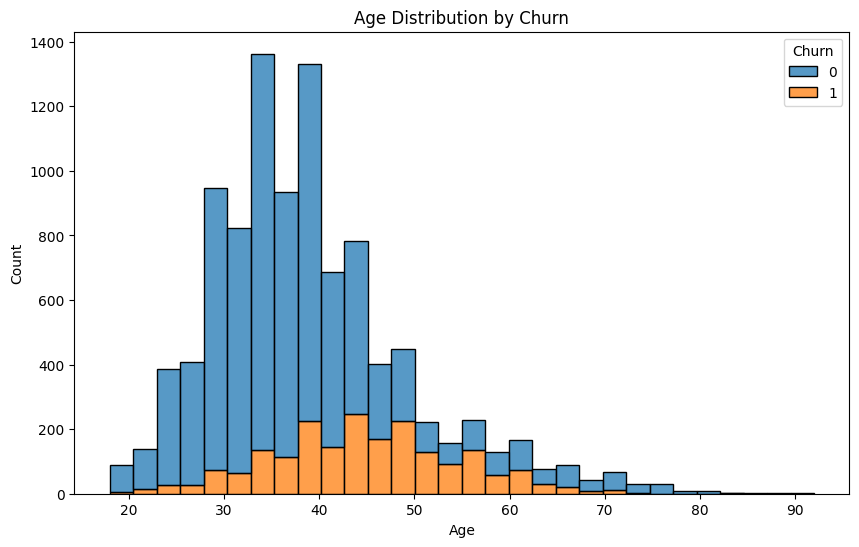

In [6]:
# Explore the distribution of 'Age' among churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Churn', multiple='stack', bins=30)
plt.title("Age Distribution by Churn")
plt.show()

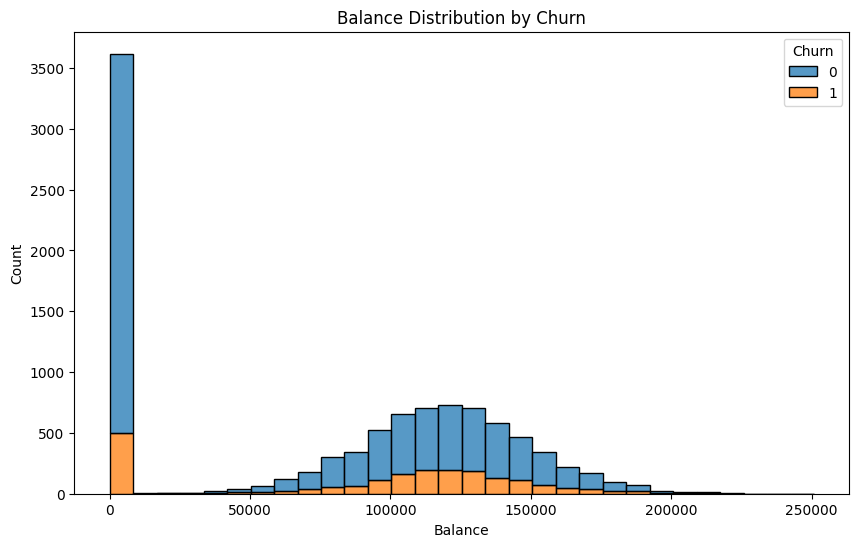

In [7]:
# Explore the distribution of 'Balance'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balance', hue='Churn', multiple='stack', bins=30)
plt.title("Balance Distribution by Churn")
plt.show()

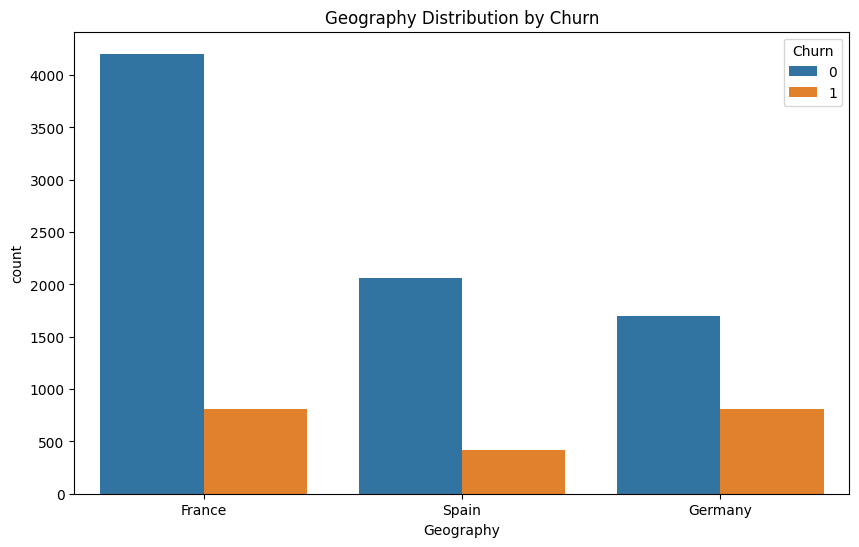

In [8]:
# Explore categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Geography', hue='Churn')
plt.title("Geography Distribution by Churn")
plt.show()

## **Data Preprocessing**

In [9]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Split features and target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [12]:
missing_values = data.isnull().sum()
missing_values

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [15]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace = True)

In [16]:
data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)

In [18]:
data['Num Of Products'].value_counts()

0    5084
1    4916
Name: Num Of Products, dtype: int64

In [17]:
data.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace = True)

## **Define Target Variable (y) and Feature Variables (X)**

In [29]:


# Define the target variable 'y'
y = data['Churn']

# Define the feature variables 'X' (excluding irrelevant columns)
X = data.drop(['CustomerId', 'Surname', 'Churn'], axis=1)




## **Train Test Split**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split completed.")

Train-test split completed.


## **Modeling**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.8005


## **Model Evaluation**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate and print classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix:
 [[1573   34]
 [ 365   28]]


## **Prediction**

In [36]:
new_data = pd.DataFrame({
    'CreditScore': [600],
    'Geography': [2],
    'Gender': [0],
    'Age': [40],
    'Tenure': [5],
    'Balance': [10000],
    'Num Of Products': [2],
    'Has Credit Card': [1],
    'Is Active Member': [1],
    'Estimated Salary': [50000]
})

new_predictions = model.predict(new_data)

# Print the predicted churn values
print("Predicted Churn values:", new_predictions)

Predicted Churn values: [0]


## **Explaination**

1. Training the Model:
You used a Logistic Regression model to predict the churn outcome based on customer features. Logistic Regression is a common choice for binary classification tasks, like predicting whether a customer will churn or not (1 or 0).

2. Feature Preprocessing:
Before training, you preprocessed the features. This involves standard scaling for numeric features and one-hot encoding for categorical features (like 'Geography' and 'Gender'). This preprocessing step helps the model by ensuring that all features have similar scales and making categorical data suitable for the model.

3. Model Fitting:
The model learned patterns in the training data by fitting itself to the features and target variable. It learned the relationships between different features and how they relate to the target variable (churn).

4. Model Evaluation:
You used accuracy as a metric to evaluate the model's performance. Accuracy is the proportion of correct predictions out of all predictions. While accuracy can be a good starting point, it might not tell the whole story, especially in cases of imbalanced classes or when the costs of false positives and false negatives are different.

5. Interpreting Accuracy:
An accuracy of 81% means that, on the test set, the model correctly predicted the churn outcome for 81% of the cases. However, it's important to delve deeper into the confusion matrix and other metrics to get a more comprehensive understanding of the model's performance.

6. Consider Other Metrics:
Accuracy can be misleading if the dataset is imbalanced. For instance, if 90% of customers don't churn and the model predicts non-churn for all cases, it can still achieve high accuracy. To get a more complete picture, consider metrics like precision, recall, F1-score, and the confusion matrix.